<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/km_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# КМ 3

## Для лр №3:

1. Полностью расписать алгоритм моделирования с формированием управления с ССК.
В примере указывалось формирование ООС по 1 координате (x) необходимо расписать по другим (y,psi).
не забыть указать формулы для математического ожидания и  СКО
после построения управления строим разности по координатам в ССК и НСК в вариантах (прогноз - идеальное) (прогноз с ООС - идеальное) сравниваем 2 варианта по характеристикам случайного процесса.


2. Используя расписанные аглоритмы сформировать управления для данных ЛР-1-3. сравнить полученные результаты с исходным вариантом (движение в прогнозе). 

### Библиотеки:

In [2916]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Данные:

In [2917]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


*** Предварительно руками исправили первую строчку в файлах с реальными данными так, чтобы между названиями столбцов был разделитель 2 пробела. ***

In [2918]:
df_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
df_ideal.head()

,Vx_o,Vy_o,dpsi
0,0.2,0,-0.667
1,0.2,0,-0.667
2,0.2,0,-0.667
3,0.2,0,-0.667
4,0.2,0,-0.667


In [2919]:
df_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_real.txt", sep='  ', engine='python')
df_real.head()

,t,omega_1,omega_2,omega_3,omega_4,M1,M2,M3,M4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-0.0000,0.0122,-0.0041,0.0000,0.1394,0.0338,0.0762,0.1004,0.0001,0.0001,0.0005,0.0000,0.0000,0.0001
1,0.2,3.2099,-0.0648,3.8219,-0.5471,1.9519,-0.4821,1.8549,-0.0788,0.0802,0.0137,-0.2482,0.0080,0.0014,-0.0248
2,0.3,6.6914,-0.0648,6.6630,-0.8552,1.7104,-0.7807,1.6783,-0.0969,0.1554,0.0095,-0.4635,0.0236,0.0019,-0.0711
3,0.4,8.7706,-0.5715,9.3137,-1.0862,1.7883,-0.5782,1.4403,-0.0943,0.2053,0.0132,-0.6410,0.0442,0.0018,-0.1352
4,0.5,10.2378,-0.7457,11.0281,-1.2524,1.6169,-0.6812,0.8933,-0.0857,0.2408,0.0162,-0.7553,0.0683,0.0002,-0.2107


Подготовим идеальные данные

In [2920]:
df_ideal['t'] = df_real['t']

In [2921]:
dt = 0.1

In [2922]:
def integral(V, dt):
  Integral_V=[]
  sum=0
  for v in V:
    Integral_V.append(sum)
    sum+=v*dt
  return np.array(Integral_V)

In [2923]:
df_ideal['x0'] = integral(df_ideal['Vx_o'], dt)
df_ideal['y0'] = integral(df_ideal['Vy_o'], dt)
df_ideal['psi'] = integral(df_ideal['dpsi'], dt)

In [2924]:
df_ideal.head()

,Vx_o,Vy_o,dpsi,t,x0,y0,psi
0,0.2,0,-0.667,0.1,0.00,0.0,0.0000
1,0.2,0,-0.667,0.2,0.02,0.0,-0.0667
2,0.2,0,-0.667,0.3,0.04,0.0,-0.1334
3,0.2,0,-0.667,0.4,0.06,0.0,-0.2001
4,0.2,0,-0.667,0.5,0.08,0.0,-0.2668


In [2925]:
def diff(V, t):
  dV = (V - np.concatenate(([0], V[:-1]))) / (t - np.concatenate(([0], t[:-1])))
  return dV

Найдём отклонения по скоростям

In [2926]:
columns_for_difference = ['Vx_o', 'Vy_o',	'dpsi']

In [2927]:
ddf = df_ideal[['t']+columns_for_difference].copy()
ddf[columns_for_difference] -= df_real[columns_for_difference]
ddf.head()

,t,Vx_o,Vy_o,dpsi
0,0.1,0.1999,-0.0001,-0.6675
1,0.2,0.1198,-0.0137,-0.4188
2,0.3,0.0446,-0.0095,-0.2035
3,0.4,-0.0053,-0.0132,-0.0260
4,0.5,-0.0408,-0.0162,0.0883


Найдём паразитные ускорения

In [2928]:
ddf['dVx_o'] = diff(ddf['Vx_o'], ddf['t'])
ddf['dVy_o'] = diff(ddf['Vy_o'], ddf['t'])
ddf['ddpsi'] = diff(ddf['dpsi'], ddf['t'])
ddf.head()

,t,Vx_o,Vy_o,dpsi,dVx_o,dVy_o,ddpsi
0,0.1,0.1999,-0.0001,-0.6675,1.999,-0.001,-6.675
1,0.2,0.1198,-0.0137,-0.4188,-0.801,-0.136,2.487
2,0.3,0.0446,-0.0095,-0.2035,-0.752,0.042,2.153
3,0.4,-0.0053,-0.0132,-0.0260,-0.499,-0.037,1.775
4,0.5,-0.0408,-0.0162,0.0883,-0.355,-0.030,1.143


Новые реальные скорости 

In [2929]:
def new_Vr(Vi, dV, xi, alpha):
  Vr = []
  Vu = Vi[0]
  xr = 0
  for i in range(len(Vi)):
    Vr_i = Vu * alpha + dV[i] * dt
    Vr.append(Vr_i)
    xr += Vr_i * dt
    Vu = Vi[i] + (Vi[i] - Vr_i) + (xi[i] - xr) / dt
  return Vr

In [2930]:
df_r = df_ideal[['t']].copy()
df_r['Vx_o'] = new_Vr(df_ideal['Vx_o'], ddf['dVx_o'], df_ideal['x0'], alpha=0.5)
df_r['Vy_o'] = new_Vr(df_ideal['Vy_o'], ddf['dVy_o'], df_ideal['y0'], alpha=0.5)
df_r['dpsi'] = new_Vr(df_ideal['dpsi'], ddf['ddpsi'], df_ideal['psi'], alpha=0.5)
df_r.head()

,t,Vx_o,Vy_o,dpsi
0,0.1,0.299900,-0.000100,-1.00100
1,0.2,-0.180000,-0.013500,0.58270
2,0.3,0.254850,0.017750,-0.86740
3,0.4,0.035300,-0.014650,-0.07995
4,0.5,0.241825,0.009575,-0.83040


Переведём скорости в глобальную систему координат

In [2931]:
def loc2glob_v(X_loc, Y_loc, Psi):
  X_glob=[]
  Y_glob=[]
  for i in range(len(X_loc)):
    X_glob.append(X_loc[i]*np.cos(Psi[i]) - Y_loc[i]*np.sin(Psi[i]))
    Y_glob.append(X_loc[i]*np.sin(Psi[i]) + Y_loc[i]*np.cos(Psi[i]))
  return X_glob, Y_glob

In [2932]:
def loc2glob_v_df(df):
  df['psi'] = integral(df['dpsi'], dt)
  df['Vx_g'], df['Vy_g'] = loc2glob_v(df['Vx_o'], df['Vy_o'], df['psi'])
  return df

In [2933]:
df_ideal = loc2glob_v_df(df_ideal)
df_ideal.head()

,Vx_o,Vy_o,dpsi,t,x0,y0,psi,Vx_g,Vy_g
0,0.2,0,-0.667,0.1,0.00,0.0,0.0000,0.200000,0.000000
1,0.2,0,-0.667,0.2,0.02,0.0,-0.0667,0.199555,-0.013330
2,0.2,0,-0.667,0.3,0.04,0.0,-0.1334,0.198223,-0.026601
3,0.2,0,-0.667,0.4,0.06,0.0,-0.2001,0.196009,-0.039753
4,0.2,0,-0.667,0.5,0.08,0.0,-0.2668,0.192924,-0.052729


In [2934]:
df_r = loc2glob_v_df(df_r)
df_r.head()

,t,Vx_o,Vy_o,dpsi,psi,Vx_g,Vy_g
0,0.1,0.299900,-0.000100,-1.00100,0.000000,0.299900,-0.000100
1,0.2,-0.180000,-0.013500,0.58270,-0.100100,-0.180448,0.004556
2,0.3,0.254850,0.017750,-0.86740,-0.041830,0.255369,0.007077
3,0.4,0.035300,-0.014650,-0.07995,-0.128570,0.033130,-0.019055
4,0.5,0.241825,0.009575,-0.83040,-0.136565,0.240877,-0.023436


Найдём глобальные координаты

In [2935]:
def glob_p_df(df):
  df['x0'], df['y0'] = integral(df['Vx_g'], dt), integral(df['Vy_g'], dt)
  return df

In [2936]:
df_ideal = glob_p_df(df_ideal)
df_ideal.head()

,Vx_o,Vy_o,dpsi,t,x0,y0,psi,Vx_g,Vy_g
0,0.2,0,-0.667,0.1,0.000000,0.000000,0.0000,0.200000,0.000000
1,0.2,0,-0.667,0.2,0.020000,0.000000,-0.0667,0.199555,-0.013330
2,0.2,0,-0.667,0.3,0.039956,-0.001333,-0.1334,0.198223,-0.026601
3,0.2,0,-0.667,0.4,0.059778,-0.003993,-0.2001,0.196009,-0.039753
4,0.2,0,-0.667,0.5,0.079379,-0.007968,-0.2668,0.192924,-0.052729


In [2937]:
df_r = glob_p_df(df_r)
df_r.head()

,t,Vx_o,Vy_o,dpsi,psi,Vx_g,Vy_g,x0,y0
0,0.1,0.299900,-0.000100,-1.00100,0.000000,0.299900,-0.000100,0.000000,0.000000
1,0.2,-0.180000,-0.013500,0.58270,-0.100100,-0.180448,0.004556,0.029990,-0.000010
2,0.3,0.254850,0.017750,-0.86740,-0.041830,0.255369,0.007077,0.011945,0.000446
3,0.4,0.035300,-0.014650,-0.07995,-0.128570,0.033130,-0.019055,0.037482,0.001153
4,0.5,0.241825,0.009575,-0.83040,-0.136565,0.240877,-0.023436,0.040795,-0.000752


Изобразим траектории

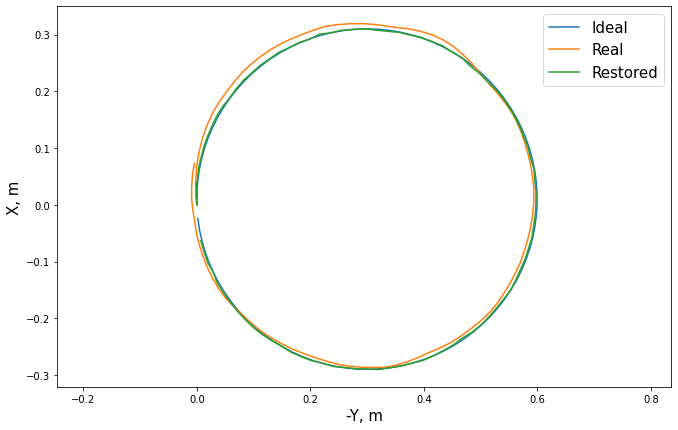

In [2938]:
plt.figure(figsize=(11, 7))
plt.plot(-df_ideal['y0'], df_ideal['x0'], label="Ideal")
plt.plot(-df_real['y0'], df_real['x0'], label="Real")
plt.plot(-df_r['y0'], df_r['x0'], label="Restored")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

Разности координат

In [2939]:
ddf['x0_i_real'] = df_ideal['x0'] - df_real['x0']
ddf['y0_i_real'] = df_ideal['y0'] - df_real['y0']
ddf['psi_i_real'] = df_ideal['psi'] - df_real['psi']

ddf['x0_i_r'] = df_ideal['x0'] - df_r['x0']
ddf['y0_i_r'] = df_ideal['y0'] - df_r['y0']
ddf['psi_i_r'] = df_ideal['psi'] - df_r['psi']

ddf.head()

,t,Vx_o,Vy_o,dpsi,dVx_o,dVy_o,ddpsi,x0_i_real,y0_i_real,psi_i_real,x0_i_r,y0_i_r,psi_i_r
0,0.1,0.1999,-0.0001,-0.6675,1.999,-0.001,-6.675,0.000000,0.000000,-0.0001,0.000000,0.000000,0.000000
1,0.2,0.1198,-0.0137,-0.4188,-0.801,-0.136,2.487,0.012000,-0.001400,-0.0419,-0.009990,0.000010,0.033400
2,0.3,0.0446,-0.0095,-0.2035,-0.752,0.042,2.153,0.016356,-0.003233,-0.0623,0.028010,-0.001779,-0.091570
3,0.4,-0.0053,-0.0132,-0.0260,-0.499,-0.037,1.775,0.015578,-0.005793,-0.0649,0.022296,-0.005146,-0.071530
4,0.5,-0.0408,-0.0162,0.0883,-0.355,-0.030,1.143,0.011079,-0.008168,-0.0561,0.038584,-0.007216,-0.130235


Мат. ожидание и СКО

In [2940]:
def math_e(series):
  return series.sum()/len(series)

In [2941]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [2942]:
df_math_sko = pd.DataFrame({
     'X': [math_e(ddf['x0_i_real']),
           s_dev(ddf['x0_i_real'], math_e(ddf['x0_i_real'])),
           math_e(ddf['x0_i_r']),
           s_dev(ddf['x0_i_r'], math_e(ddf['x0_i_r']))], 
     'Y': [math_e(ddf['y0_i_real']),
           s_dev(ddf['y0_i_real'], math_e(ddf['y0_i_real'])),
           math_e(ddf['y0_i_r']),
           s_dev(ddf['y0_i_r'], math_e(ddf['y0_i_r']))], 
     'Psi': [math_e(ddf['psi_i_real']),
           s_dev(ddf['psi_i_real'], math_e(ddf['psi_i_real'])),
           math_e(ddf['psi_i_r']),
           s_dev(ddf['psi_i_r'], math_e(ddf['psi_i_r']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
df_math_sko

,X,Y,Psi
Math_ir,-0.006803,-0.022222,0.150078
SKO_ir,0.039542,0.032820,0.104584
Math_iv,-0.001440,-0.001877,-0.128501
SKO_iv,0.026990,0.028269,0.023015
